# TASCA M8 T01
Exercicis d'algoritmes d'Agrupació.

# > Exercici 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

In [1]:
# Importació de biblioteques
# ==========================
import os
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
filePath = r"C:\Formación\2022 BarcelonaActiva\CursDSOnline\Sprint08_aprenentatge_no_supervisat" + os.sep
file = filePath + "Publicacions Facebook Thailandia.csv"
dfFace = pd.read_csv(file)
dfFace.head(4)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
dfFace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [4]:
# Preparació del dataset
# ======================
dfFace1 = dfFace.drop(["Column1", "Column2", "Column3", "Column4"], axis=1)   # Elimino les columnes amb només valors nuls
dfFace1

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [5]:
# Converteixo objectes (columnes) en float32

dfFace1["status_id"] = dfFace1["status_id"].str.replace('_','').astype(np.float32)

dfFace1["status_published"] = dfFace1["status_published"].str.replace("/","").str.replace(" ","").str.replace(":","")
dfFace1["status_published"] = dfFace1["status_published"].astype(np.float32)

# Converteixo les dades string en tipus booleana: "video" és True i "photo", False 
dfFace1["status_type"] = dfFace1["status_type"].str.contains("video")  
# Transformo la bool True/False a 1/0
dfFace1["status_type"] = dfFace1["status_type"].astype(np.float32)  

In [6]:
dfFace1.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,2.466755e+30,1.0,4.222019e+09,529,512,262,432,92,3,1,1,0
1,2.466755e+30,0.0,4.212018e+10,150,0,0,150,0,0,0,0,0
2,2.466755e+30,1.0,4.212019e+09,227,236,57,204,21,1,1,0,0
3,2.466755e+30,0.0,4.212018e+09,111,0,0,111,0,0,0,0,0
4,2.466755e+30,0.0,4.182018e+09,213,0,0,204,9,0,0,0,0


In [7]:
dfFace1.dtypes

status_id           float32
status_type         float32
status_published    float32
num_reactions         int64
num_comments          int64
num_shares            int64
num_likes             int64
num_loves             int64
num_wows              int64
num_hahas             int64
num_sads              int64
num_angrys            int64
dtype: object

In [8]:
# Escalat estàndard de les dades

sc = StandardScaler()
dfFaceSc = sc.fit_transform(dfFace1)

In [9]:
dfFaceSc[:4]

array([[ 0.23845248,  1.42146599, -0.40797016,  0.64610394,  0.32335035,
         1.6868788 ,  0.48272661,  1.98326643,  0.1961959 ,  0.07671305,
         0.47357035, -0.15574803],
       [ 0.23845248, -0.70349907,  0.98201782, -0.17319166, -0.25220622,
        -0.3041444 , -0.14472021, -0.3184544 , -0.147879  , -0.17600986,
        -0.152587  , -0.15574803],
       [ 0.23845248,  1.42146599, -0.40833693, -0.00673846,  0.01308938,
         0.12901714, -0.02457082,  0.2069384 , -0.03318737,  0.07671305,
        -0.152587  , -0.15574803],
       [ 0.23845248, -0.70349907, -0.40833695, -0.25749912, -0.25220622,
        -0.3041444 , -0.23149477, -0.3184544 , -0.147879  , -0.17600986,
        -0.152587  , -0.15574803]])

In [10]:
# Agrupació de les dades
kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [11]:
kmeans

KMeans(init='random', n_clusters=5, random_state=42)

In [12]:
# Ajusto la classe k-means a dades escalades
kmeans.fit(dfFaceSc)

KMeans(init='random', n_clusters=5, random_state=42)

In [13]:
# Càlcul del SEE (valor més petit)
kmeans.inertia_  

45954.68425813671

In [14]:
# Posició final dels centroides
kmeans.cluster_centers_

array([[-4.02645207e-01, -3.10601885e-01,  2.45186867e-02,
         3.38418247e+00, -1.85165100e-01, -2.18711357e-01,
         3.50379777e+00, -2.40466403e-01,  1.36460673e-01,
        -1.27966180e-01, -1.33019579e-01, -1.48581520e-01],
       [ 8.49905001e-01,  1.28303178e+00, -8.39936706e-02,
         7.79103139e-01,  3.24446178e+00,  2.91727638e+00,
         5.52875361e-01,  2.49610912e+00,  3.41895364e-01,
         1.36831648e+00,  1.49744980e+00,  1.88355517e+00],
       [-3.26497285e-01,  1.35896701e+00, -4.33751875e-01,
         2.79403685e+00,  1.67961793e+00,  5.39736106e+00,
         1.94369348e+00,  7.14227048e+00,  1.15439209e+01,
         7.16782069e+00,  1.70746866e+00,  2.35337266e+00],
       [ 2.52003818e-02, -7.03499070e-01,  5.27734534e-02,
        -2.99645950e-01, -2.38887468e-01, -2.90860317e-01,
        -2.79394990e-01, -2.87560692e-01, -8.69736056e-02,
        -1.41636774e-01, -8.25694016e-02, -1.35337709e-01],
       [-1.05832342e-01,  1.42146599e+00, -1.0300299

In [15]:
# Nombre de iteracions per convergir
kmeans.n_iter_

24

In [16]:
# Assignació dels clústers
kmeans.labels_[:10]

array([4, 3, 4, 3, 3, 3, 4, 4, 3, 3])

# > Exercici 2
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

In [17]:
# Importació de biblioteques
# ==========================
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [18]:
# Prenc dues variables (num_reactions i num_comments)  
X = dfFace1.iloc[:, [3, 4]].values

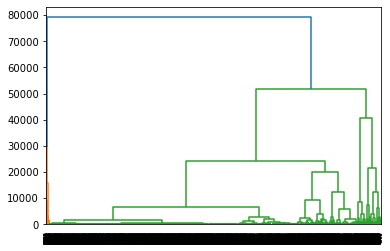

In [19]:
ddgram = sch.dendrogram(sch.linkage(X, method='ward'))

In [21]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  # 5 centroides
model.fit(X)
labels = model.labels_

# Obtenció d'una matriu amb valors que corresponen a les diferents categories
model.labels_

array([2, 4, 4, ..., 1, 4, 1], dtype=int64)

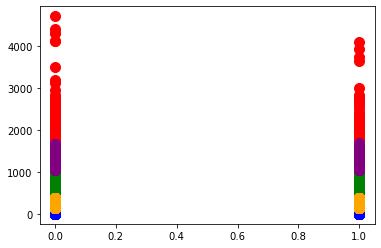

In [22]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=100, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=100, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=100, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=100, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=100, marker='o', color='orange')
plt.show()

In [33]:
# Elaboro un 2n dendrograma
X2 = dfFace1.iloc[:, [1,3]].values

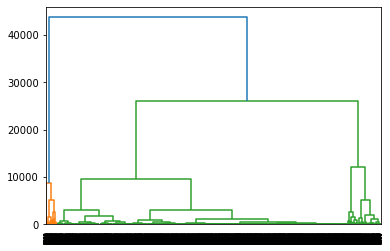

In [24]:
ddgram2 = sch.dendrogram(sch.linkage(X2, method='ward'))

In [34]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  # 4 centroides
model.fit(X2)
labels = model.labels_

model.labels_

array([2, 0, 0, ..., 0, 0, 0], dtype=int64)

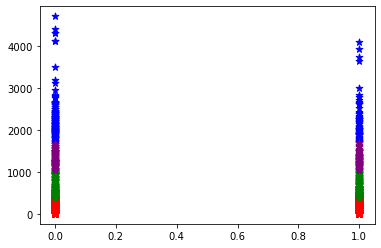

In [35]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='*', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='*', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='*', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='*', color='purple')

plt.show()

# > Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.